<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-2/blob/main/ACTIVIDADES_SEMANALES/Semana4_actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ACTIVIDAD SEMANAL -- 4**

* **Equipo:** 2
* **Integrantes:** Andrea Carolina Treviño Garza (A01034993),
Mario Alberto Corona Cadenas (A01793016)

###**Parte 1: Ejercicio guiado** : Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos
* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales

In [1]:
#Importamos liberías principales:
import pandas as pd
import numpy as np

Leemos la base de datos con libería pandas(pd) y guardamos el dataframe en la variable df.

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", index_col = 0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Revisamos el método info para verificar que tipo de datos tiene cada columna.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

Copiamos nuestro dataframe original en otra variable para no perder datos originales

In [4]:
my_df = df.copy()
my_df.drop(["Y"],axis = 1, inplace = True)

Reemplazamos los valosres vacíos con la mediana de cada columna.

In [5]:
for column in my_df:
  current_media = my_df[column].median()
  my_df[column].fillna(value = current_media, inplace = True)

Revisamos que efectivamente no quede ningún valor vacío.

In [6]:
my_df.isnull().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
dtype: bool

Importar librería de sklearn para realizar Estandarización de datos. Además creamos una lita con los nombres de las columnas

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(my_df)
Norm_df = scaler.transform(my_df)
Norm_df = pd.DataFrame(Norm_df)

columns = ["X{}".format(i) for i in range(1,24)]
Norm_df.columns = columns

In [18]:
#Inspeccionamos resultados de Estandarización, que media sea cercana a 0 y desviación cercana a 1. 
Norm_df_info = {"Mean":Norm_df[Norm_df.columns].mean()[0:24], "Standard Deviation":Norm_df[Norm_df.columns].std()[0:24]}

pd.DataFrame(Norm_df_info, index = Norm_df.columns).transpose()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Mean,-6.063298e-17,2.823223e-16,6.252776e-17,-6.063298e-17,-7.579123e-17,-5.115908e-17,-3.694822e-17,-6.631732e-18,3.126388e-17,-5.873820e-17,...,5.684342e-17,-3.221127e-17,-5.115908e-17,-2.984279e-17,-1.231607e-17,-9.473903e-19,9.473903e-18,1.563194e-17,8.526513e-18,2.332949e-17
Standard Deviation,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00


Aplicamos **PCA**

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 23)
pca_t = pca.fit_transform(Norm_df)
pca_t

array([[-1.88822477, -0.90578131, -0.48722692, ...,  0.020638  ,
         0.0167663 ,  0.01223813],
       [-0.76519232, -2.10930687,  1.09742235, ...,  0.01087403,
         0.00447663,  0.00912198],
       [-0.84766388, -1.07208467,  0.41205899, ..., -0.08069348,
        -0.04116856, -0.05722587],
       ...,
       [ 0.35718006, -3.31352191,  0.61119187, ...,  0.01750137,
        -0.01239157, -0.02017633],
       [ 0.65086365,  0.72287671,  0.52409569, ...,  0.18335402,
        -0.14279585, -0.00700701],
       [-0.14565142, -0.80982442, -1.324014  , ..., -0.01564852,
         0.11570824, -0.04615943]])

Obtenemos un resumen del PCA, con su Proporción acumulada (para saber cuántos PCs considerar)

In [10]:
PCAcolumns = ["PC"+str(i) for i in range(1,24)]

pcaSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
                          ).transpose().round(4)

pcaSummary.columns = PCAcolumns
pcaSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.5579,2.0244,1.2454,1.2133,1.0126,0.9784,0.9527,0.9421,0.9334,0.8848,...,0.7242,0.6355,0.5096,0.4992,0.4347,0.3631,0.2649,0.2020,0.1591,0.1524
Proportion of variance,0.2845,0.1782,0.0674,0.0640,0.0446,0.0416,0.0395,0.0386,0.0379,0.0340,...,0.0228,0.0176,0.0113,0.0108,0.0082,0.0057,0.0031,0.0018,0.0011,0.0010
Cumulative proportion,0.2845,0.4626,0.5301,0.5941,0.6387,0.6803,0.7197,0.7583,0.7962,0.8303,...,0.9394,0.9570,0.9683,0.9791,0.9873,0.9931,0.9961,0.9979,0.9990,1.0000


Paso 2: Interprete cada componente principal en términos de las variables originales
* Examine la magnitud y la dirección de los coeficientes de las variables originales.
*Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.*

Definimos un límite dinámico para decidir cuantos Componentes del PCA consideramos.

In [19]:
threshold = 0.85
PC_count = 1
for pc in pcaSummary.transpose()["Cumulative proportion"]:
  if pc >= threshold: 
    print("PC{}".format(PC_count))
    break
  PC_count = PC_count + 1

PC11


Aquí observamos la composición de cada componente del PCA en términos de nuestras variables originales (seleccionamos los de nuesto límite dinámico PC_count)

In [12]:
CompVar_df = pd.DataFrame(
                        pca.components_.round(4),
                        columns = pcaSummary.columns, 
                        index = Norm_df.columns) 
CompVar_df.iloc[:,:PC_count]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
X1,0.0686,-0.0217,0.0192,-0.0056,0.0142,0.1610,0.1941,0.2002,0.2070,0.2108,0.2063
X2,0.3163,0.0306,-0.0916,-0.0432,0.0666,-0.2982,-0.3349,-0.3438,-0.3446,-0.3316,-0.3058
X3,0.0173,0.0240,-0.3162,0.4531,-0.4624,-0.0174,0.0179,0.0615,0.0889,0.1087,0.1109
X4,0.0699,-0.0779,0.2467,-0.4447,0.4628,0.0161,0.0499,0.0840,0.1094,0.1156,0.1099
X5,-0.1495,0.8840,0.3651,-0.0532,-0.1641,-0.0347,-0.0372,-0.0235,-0.0077,0.0016,0.0121
X6,-0.3756,-0.3956,0.5656,0.2798,-0.0886,-0.0397,-0.0609,-0.0699,-0.0873,-0.0871,-0.0914
X7,0.1058,0.0648,-0.3993,-0.1595,0.0812,-0.0868,-0.0922,-0.0214,0.0394,0.1040,0.1390
X8,-0.0593,-0.0274,0.0807,0.0262,-0.0128,0.0215,0.0157,-0.0264,-0.0562,-0.0340,0.0468
X9,0.0215,0.0188,-0.1547,-0.0559,0.0467,-0.0304,-0.0334,-0.0115,0.0443,0.0544,-0.0008
X10,0.0175,0.0244,0.0625,0.0386,0.0080,0.0033,0.0066,-0.0248,-0.0568,0.0668,0.0142


Aquí observamos la variable con mayor peso de cada PC (del PCA)

In [37]:
V1 = CompVar_df.iloc[:,:PC_count].idxmax()
#Para obtener variables únicas de los PCs.
V1 = V1.unique()
#Hacemos un poco de procesamiento para ordenar los nombres de las columnas
V1 = [i[1:] for i in V1]
V1.sort(key=int)
V1 = ['X'+i for i in V1]

Estas son las variables con las que deseamos quedarnos ya que son las que tienen mayor peso de cada PC (del PCA)

In [36]:
stay_var = V1
for s_v in stay_var:
  print(s_v)

X1
X5
X6
X12
X13
X16
X18
X19


Por lo que podemos encontrar las variables que estaríamos eliminando porque tienen menos peso

In [38]:
from collections import Counter

drop_var = Counter(columns) - Counter(stay_var)
drop_var = list(drop_var)
for d_v in drop_var:
  print(d_v)

X2
X3
X4
X7
X8
X9
X10
X11
X14
X15
X17
X20
X21
X22
X23


Estas son las varibles que nos interesan para generar nuestro modelo, ya que estos explican la mayoría de la información. 

In [16]:
clean_df = df.copy()
drop_var.append("Y")
clean_df.drop(drop_var,axis = 1, inplace = True)
clean_df

,X1,X5,X6,X12,X13,X16,X18,X19
1,20000,24.0,2.0,3913.0,3102.0,0.0,0.0,689.0
2,120000,26.0,-1.0,2682.0,1725.0,3455.0,0.0,1000.0
3,90000,34.0,0.0,29239.0,14027.0,14948.0,1518.0,1500.0
4,50000,37.0,0.0,46990.0,48233.0,28959.0,2000.0,2019.0
5,50000,57.0,-1.0,8617.0,5670.0,19146.0,2000.0,36681.0
...,...,...,...,...,...,...,...,...
29996,220000,39.0,0.0,188948.0,192815.0,31237.0,8500.0,20000.0
29997,150000,43.0,-1.0,1683.0,1828.0,5190.0,1837.0,3526.0
29998,30000,37.0,4.0,3565.0,3356.0,20582.0,0.0,0.0
29999,80000,41.0,1.0,-1645.0,78379.0,11855.0,85900.0,3409.0


Paso 3: Identifique valores atípicos.
* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


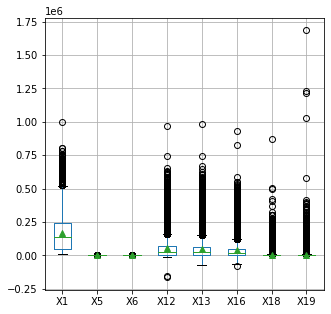

In [62]:
import matplotlib.pyplot as plt
#plt.boxplot(x = clean_df.X1, showmeans=True)
#plt.show()
stud_bplt = clean_df.boxplot(figsize = (5,5), column = stay_var, labels=stay_var, showmeans=True)
stud_bplt.plot()
plt.show()

###**Parte 2:** Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

1.   ¿Cuál es el número de componentes mínimo y por qué?



2.   ¿Cuál es la variación de los datos que representan esos componentes?

3.   ¿Cuál es la pérdida de información después de realizar PCA?

4.   De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

5.   ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?